# <span style="color:green">     <font size="8"> A New Business Opportunity

<img style="float: right; margin: auto;" src="https://www.ambulante.org/wp-content/uploads/2019/03/logos_web_Jalisco_ITESOJesuita.png" width="350" height="220" />

<span style="color:green"> <font size="4">  *Simulación de Procesos Financieros: Proyecto I*

<b> <p style = "font-family: Palatino; font-size:2em; color: green;" > Daphne Hernández | Paloma Martínez | Oscar Flores </p> <b/>

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from wordcloud import WordCloud

from IPython.display import display, HTML
display(HTML(""" <style> .output {display: center; align-items: center; text-align: center; justify-content: center; } </style> """))

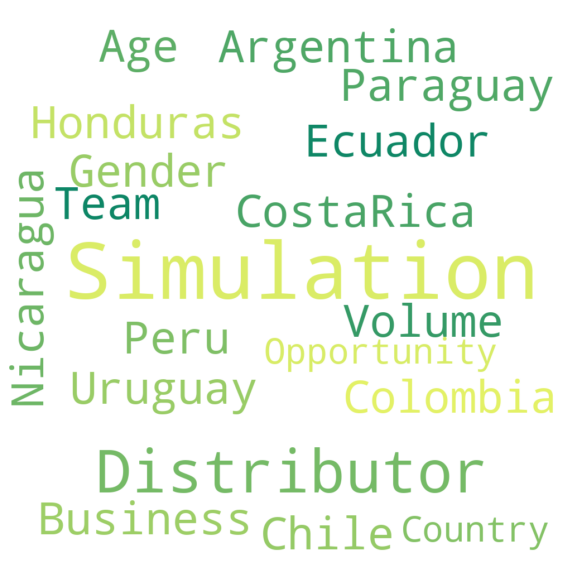

In [164]:
text=("Simulation Argentina Ecuador Colombia CostaRica Nicaragua Honduras Peru Paraguay Uruguay Chile Gender Age Distributor Distributor Team Volume Business Opportunity Country Simulation simulation Simulation")

wordcloud = WordCloud(width=1000, height=1000, margin=0, colormap="summer", background_color="white").generate(text)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  Este proyecto se basa en el análisis de datos obtenidos por las ventas de una compañía de productos relacionados con la nutrición, el control de peso, las dietas deportivas y el cuidado personal. Además, se buscará encontrar el comportamiento de las nuevas personas, que se encuentren en situación similar a alguna que ya existe en el negocio. </p>
    
### 1.2 Objetivos:

> #### 1.2.1 Objetivo General:
> <p style = "font-family: Calibri Light; font-size:1.3em;color:black;"> Analizar el comportamiento y compra de producto de los nuevos distribuidores en sus siguientes tres meses en base al comportamiento de los distribuidores ya existentes. </p>
>
> #### 1.2.2 Objetivos específicos:
>
> <p style = "font-family: Calibri Light; font-size:1.3em;color:black;">  * De acuerdo a cada país, realizar una comparación de su productividad total. </p>
> <p style = "font-family: Calibri Light; font-size:1.3em;color:black;"> * Separar el volumen total de acuerdo al género del distribuidor.</p>
> <p style = "font-family: Calibri Light; font-size:1.3em;color:black;"> * Analizar las diferencias de comportamiento de acuerdo a la edad del distribuidor.</p>
> <p style = "font-family: Calibri Light; font-size:1.3em;color:black;"> * Dependiendo de su equipo, examinar las compras de los distribuidores. </p>

### 1.3 Definición del problema:

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  Para meterlos un poco en contexto, Herbalife es una compañía de venta directa establecida a nivel global, proporcionan productos innovadores nutricionales con respaldo científico. Actualmente cubren clientes en alrededor de 90 países. Ofrecen también una oportunidad de negocio individual. El problema principal que tiene esta empresa Herbalife es que no tienen idea de como se van a comportar sus ventas en un futuro. Sus ventas son tan volátiles y abarcan tanto mercado en el mundo, que no han logrado definir en que país se vende más, o cual es el perfil de vendedor ideal para poderse enfocar más en ellos. Cuando investigamos sobre esta empresa multinivel nos dimos cuenta que querían aumentar sus ventas en línea impulsando el e-commerce e invirtiendo en las redes sociales. Concluimos que para hacer esto, la empresa tiene que tener muy definido su nicho de mercado y sus países líderes para no querer acaparar al mundo entero. Si Herbalife quiere invertir en el e-commerce nosotros les podremos ayudar a modelar sus ganancias para ver cuanto dinero podrían invertir en esta área, así como en otras y principalmente, obvservar el comportamiento de los distribuidores que entren al negocio, y simular su comportamiento y encontrar su máximo desempeño, dependiendo de la información de los distribuidores con características similares.

### 1.4 Nodos y Variables a simular

<p style = "font-family: Calibri Light; font-size:1.2em;color:black;"> Dentro de nuestra base de datos, encontramos 4 nodos a simular:
    
   * El país donde se encontrará registrado el distribuidor
   * El género del distribuidor
   * La edad del distribuidor en tiempo 0
   * El equipo del distribuidor (mientras mejor equipo, más beneficios se obtienen)
   * Los puntos de compra del distribuidor.

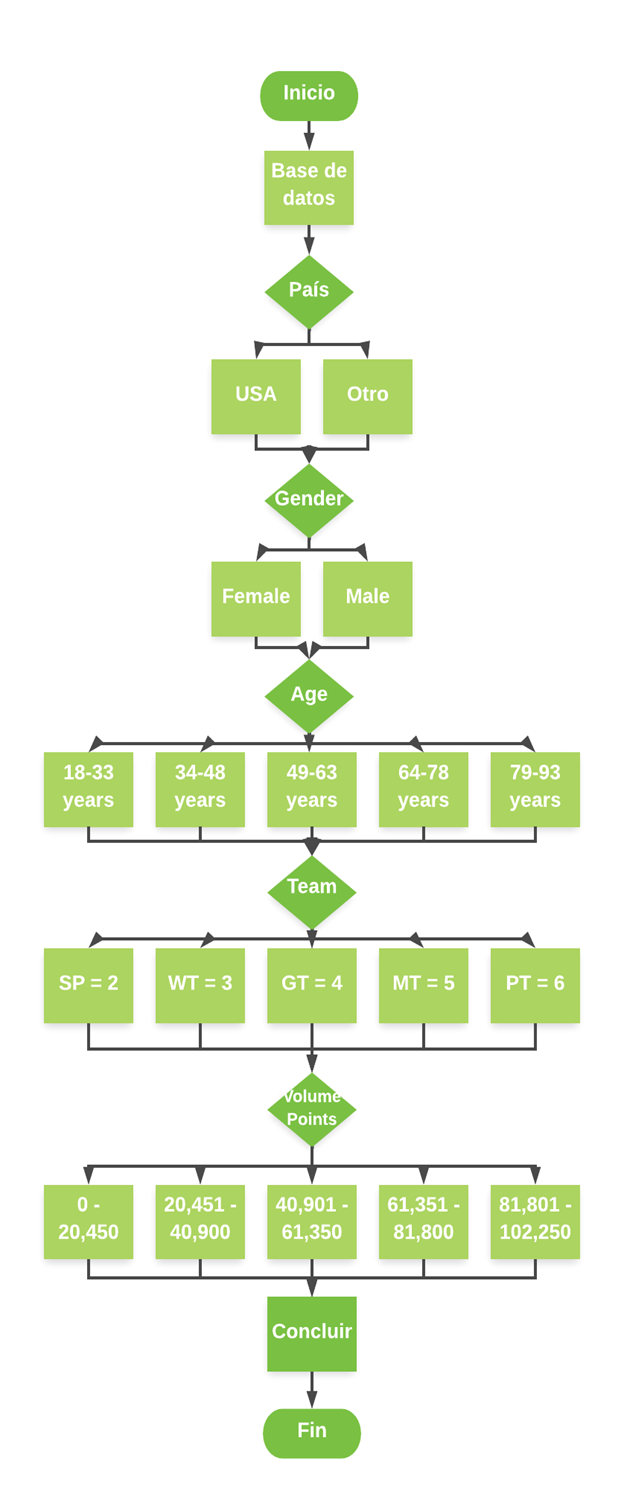

### 1.6 Obtención de la base de datos

In [117]:
DB = pd.read_excel("Base de Datos.xlsx")
DB

,Distributor,Age,Gender,Country,Team,October,November,December
0,1,46,Male,Colombia,PT,2828.11,3116.15,5573.25
1,2,49,Male,Colombia,GT,5003.90,3515.00,5972.60
2,3,55,Female,Colombia,PT,2627.95,2509.50,2537.75
3,4,24,Female,Ecuador,SP,23.95,280.65,254.95
4,5,58,Female,Chile,MT,2507.65,2507.80,2506.65
...,...,...,...,...,...,...,...,...
12353,12354,33,Female,Uruguay,SP,667.25,461.00,613.25
12354,12355,54,Female,Uruguay,SP,1095.70,1640.30,2514.35
12355,12356,41,Male,Uruguay,GT,8011.15,2547.65,2587.85
12356,12357,30,Male,Uruguay,SP,0.00,346.80,62.85


In [118]:
DB.infer_objects()
DB.dtypes

Distributor      int64
Age              int64
Gender          object
Country         object
Team            object
October        float64
November       float64
December       float64
dtype: object

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  Se puede observar que la base de datos contiene datos cuantitativos, como la edad, o los puntos de volumen comprados por cada distribuidor, pero también existen datos caulitativos como el género, el país o el equipo, por lo que vamos a convertir los datos a cuantitativos: </p>
    
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  El equipo quedará de la siguiente forma: </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * SP -> 2 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * WT -> 3 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * GT -> 4 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * MT -> 5 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * PT -> 6 </p>

> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  El género quedará de la siguiente forma: </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Female -> 0 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Male -> 1 </p>

> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  El país quedará de la siguiente forma: </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Argentina -> 1 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Ecuador -> 2 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Colombia -> 3 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Costa Rica -> 4 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Nicaragua -> 5 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Honduras -> 6 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Peru -> 7 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Paraguay -> 8 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Uruguay -> 9 </p>
> <p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  * Chile -> 10 </p>

In [120]:
text_to_num = {"Team": {"SP": 2, "WT": 3, "GT": 4, "MT": 5, "PT": 6},
                "Gender": {"Female": 0, "Male": 1},
                "Country": {"Argentina": 1, "Ecuador": 2, "Colombia": 3, "Costa Rica": 4,
                           "Nicaragua": 5, "Honduras": 6, "Peru": 7, "Paraguay": 8, "Uruguay": 9,
                           "Chile": 10}}
DB.replace(text_to_num, inplace=True)

In [121]:
DB

,Distributor,Age,Gender,Country,Team,October,November,December
0,1,46,1,3,6,2828.11,3116.15,5573.25
1,2,49,1,3,4,5003.90,3515.00,5972.60
2,3,55,0,3,6,2627.95,2509.50,2537.75
3,4,24,0,2,2,23.95,280.65,254.95
4,5,58,0,10,5,2507.65,2507.80,2506.65
...,...,...,...,...,...,...,...,...
12353,12354,33,0,9,2,667.25,461.00,613.25
12354,12355,54,0,9,2,1095.70,1640.30,2514.35
12355,12356,41,1,9,4,8011.15,2547.65,2587.85
12356,12357,30,1,9,2,0.00,346.80,62.85


<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Así, una vez con todas las columnas cuantitativas, se puede obtener la descripción completa de la base de datos a analizar:  </p>

In [77]:
round(DB.describe(),0)

,Distributor,Age,Gender,Country,Team,October,November,December
count,21255.0,21255.0,21255.0,21255.0,21255.0,19156.0,20102.0,21057.0
mean,10628.0,36.0,0.0,1.0,2.0,924.0,806.0,679.0
std,6136.0,11.0,0.0,1.0,1.0,1811.0,1565.0,1431.0
min,1.0,16.0,0.0,1.0,2.0,-5410.0,-2710.0,-2525.0
25%,5314.0,28.0,0.0,1.0,2.0,0.0,0.0,0.0
50%,10628.0,34.0,0.0,1.0,2.0,0.0,0.0,0.0
75%,15942.0,43.0,0.0,1.0,3.0,1185.0,1009.0,779.0
max,21255.0,92.0,1.0,5.0,6.0,44977.0,30295.0,25350.0


<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Para un poco más de practicidad en el manejo de los datos obtenidos, se van a separar por nodos, para después simplemente llamar el nodo deseado:  </p>

In [123]:
#Separar los datos por nodos
# 1) País
pais = DB.iloc[:,4]

# 2) Género
sexo = DB.iloc[:,3]

# 3) Edad
edad = DB.iloc[:,2]

# 4) Equipo
equipo = DB.iloc[:,5]

# 5) Volume Points
VP = DB.iloc[:,6:8]

nodes = [pais, sexo, edad, equipo, VP]

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Con este proyecto, se quiere obtener el perfil de las siguiente 20 personas que entren al negocio:  </p>

In [124]:
n = 20
ind = len(DB)
sim = pd.DataFrame(index = np.arange(ind,ind+n), columns = DB.columns)
sim.Distributor = sim.index
sim

,Distributor,Age,Gender,Country,Team,October,November,December
12358,12358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12359,12359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12360,12360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12361,12361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12362,12362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12363,12363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12364,12364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12365,12365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12366,12366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12367,12367,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***
## Primer Nodo: País

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> El primer nodo a simular, será cuál es el país donde hay más distribuidores:  </p> 

In [125]:
n1 = nodes[1]
n1

0         3
1         3
2         3
3         2
4        10
         ..
12353     9
12354     9
12355     9
12356     9
12357     9
Name: Country, Length: 12358, dtype: int64

***
## Segundo Nodo: Género

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> El primer nodo a simular, será cuál es el país donde hay más distribuidores:  </p> 

In [126]:
n2 = nodes[2]
n2

0        1
1        1
2        0
3        0
4        0
        ..
12353    0
12354    0
12355    1
12356    1
12357    0
Name: Gender, Length: 12358, dtype: int64

In [127]:
male = sum(1 for x in n2 if x == 1)
female = sum(1 for x in n2 if x == 0)

gender = [male, female]
labels = ['male', 'female']
colors =['mediumblue','deeppink']
pos = np.arange(len(gender))
male, female

(3610, 8748)

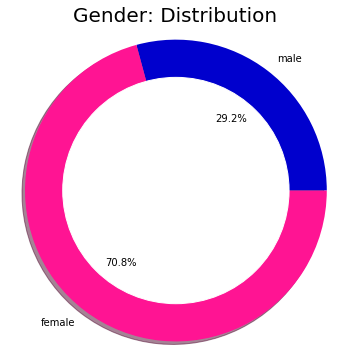

In [139]:
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(gender, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0, colors =colors)
my_circle=plt.Circle( (0,0), 0.75, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax1.axis('equal')
ax1.set_title("Gender: Distribution", size = 20)
plt.show()

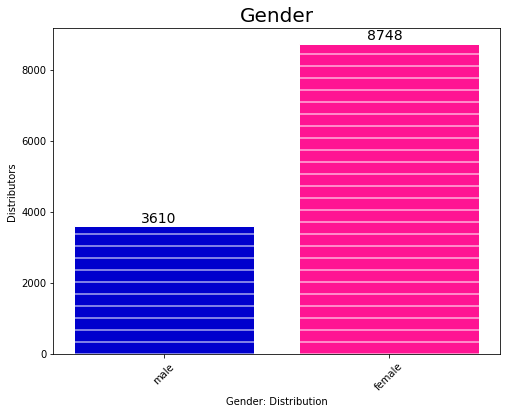

In [129]:
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.bar(pos, gender, color = (colors[0],colors[1]), hatch=("-"), edgecolor='white')
ax1.set_title("Gender", size = 20)
ax1.set_xlabel("Gender: Distribution")
ax1.set_ylabel("Distributors")
plt.xticks(pos, labels, rotation = 45)
 
[plt.text(x = pos[i]-0.1 , y = gender[i]+100, s = gender[i], size = 14) for i in range(0,len(pos))]

plt.show()

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> Al ser solo dos valores posibles, podemos decir que este nodo sigue la distribución de Bernoulli. </p> 

   \begin{equation}
     \label{eq:aqui-le-mostramos-como-hacerle-la-llave-grande}
     f(x) = \left\{
	       \begin{array}{ll}
		 p & \mathrm{si\ } x = 1 \\
		 q = 1-p & \mathrm{si\ } x = 0
	       \end{array}
	     \right.
   \end{equation}

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify"> para obtener el valor de $p$, es sacar la probabilidad de que el distribuidor sea de Estados Unidos: $ p =  \frac{male}{ total} $ y el valor de $q$ es simplemente $1-p$</p> 

In [130]:
#Obtener el valor de p:

p = male/len(n2)
q = 1-p
print("El valor de p es:", round(p,3), "o", round(p*100,2), "%")
print("El valor de q es:", round(q,3), "o", round(q*100,2), "%")

El valor de p es: 0.292 o 29.21 %
El valor de q es: 0.708 o 70.79 %


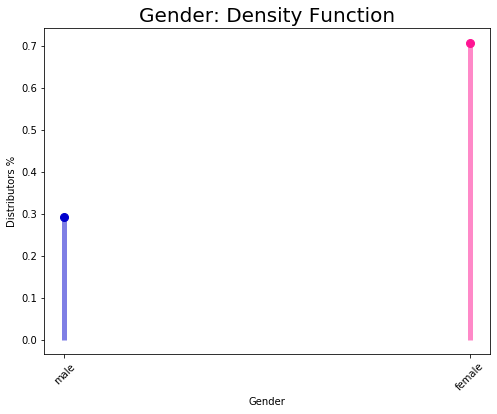

In [131]:
fig1, ax1 = plt.subplots(figsize=(8,6))
x = np.arange(stats.bernoulli.ppf(0.01, p),stats.bernoulli.ppf(0.99, p))
ax1.plot(x+1, stats.bernoulli.pmf(x, p), 'o', color=colors[1], ms=8)
ax1.plot(x, stats.bernoulli.pmf(x, q), 'o',color=colors[0], ms=8)
ax1.vlines(x+1, 0, stats.bernoulli.pmf(x, p), colors=colors[1], lw=5, alpha=0.5)
ax1.vlines(x, 0, stats.bernoulli.pmf(x, q), colors=colors[0], lw=5, alpha=0.5)
ax1.set_title("Gender: Density Function", size = 20)
ax1.set_xlabel("Gender")
ax1.set_ylabel("Distributors %")
plt.xticks(pos, labels, rotation = 45)
plt.show()

In [132]:
gender_sim = np.random.binomial(1, p, 20)
gender_sim

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [133]:
sim.Gender = gender_sim
sim

,Distributor,Age,Gender,Country,Team,October,November,December
12358,12358,NaN,0,NaN,NaN,NaN,NaN,NaN
12359,12359,NaN,0,NaN,NaN,NaN,NaN,NaN
12360,12360,NaN,1,NaN,NaN,NaN,NaN,NaN
12361,12361,NaN,0,NaN,NaN,NaN,NaN,NaN
12362,12362,NaN,0,NaN,NaN,NaN,NaN,NaN
12363,12363,NaN,0,NaN,NaN,NaN,NaN,NaN
12364,12364,NaN,0,NaN,NaN,NaN,NaN,NaN
12365,12365,NaN,0,NaN,NaN,NaN,NaN,NaN
12366,12366,NaN,0,NaN,NaN,NaN,NaN,NaN
12367,12367,NaN,0,NaN,NaN,NaN,NaN,NaN


***
## Tercer Nodo: Edad

In [134]:
n3 = nodes[2]
n3

0        1
1        1
2        0
3        0
4        0
        ..
12353    0
12354    0
12355    1
12356    1
12357    0
Name: Gender, Length: 12358, dtype: int64

***

## Cuarto Nodo: Equipo

In [135]:
n4 = nodes[3]
n4

0        2828.11
1        5003.90
2        2627.95
3          23.95
4        2507.65
          ...   
12353     667.25
12354    1095.70
12355    8011.15
12356       0.00
12357       0.00
Name: October, Length: 12358, dtype: float64

***
## Quinto Nodo: Volumen

In [136]:
n5 = nodes[4]
n5

,November,December
0,3116.15,5573.25
1,3515.00,5972.60
2,2509.50,2537.75
3,280.65,254.95
4,2507.80,2506.65
...,...,...
12353,461.00,613.25
12354,1640.30,2514.35
12355,2547.65,2587.85
12356,346.80,62.85


***

### Obtención de resultados:

In [137]:
sim.Team = sim.Team.apply(str)
sim.Gender = sim.Gender.apply(str)
sim.Country = sim.Country.apply(str)

sim.Team = sim.Team.replace("2", "SP")
sim.Team = sim.Team.replace("3", "WT")
sim.Team = sim.Team.replace("4", "GT")
sim.Team = sim.Team.replace("5", "MT")
sim.Team = sim.Team.replace("6", "PT")

sim.Gender = sim.Gender.replace("0", "Female")
sim.Gender = sim.Gender.replace("1", "Male")

sim.Country = sim.Country.replace("1", "Argentina")
sim.Country = sim.Country.replace("2", "Ecuador")
sim.Country = sim.Country.replace("3", "Colombia")
sim.Country = sim.Country.replace("4", "Costa Rica")
sim.Country = sim.Country.replace("5", "Nicaragua")
sim.Country = sim.Country.replace("6", "Honduras")
sim.Country = sim.Country.replace("7", "Peru")
sim.Country = sim.Country.replace("8", "Paraguay")
sim.Country = sim.Country.replace("9", "Uruguay")
sim.Country = sim.Country.replace("10", "Chile")

In [138]:
sim

,Distributor,Age,Gender,Country,Team,October,November,December
12358,12358,NaN,Female,nan,nan,NaN,NaN,NaN
12359,12359,NaN,Female,nan,nan,NaN,NaN,NaN
12360,12360,NaN,Male,nan,nan,NaN,NaN,NaN
12361,12361,NaN,Female,nan,nan,NaN,NaN,NaN
12362,12362,NaN,Female,nan,nan,NaN,NaN,NaN
12363,12363,NaN,Female,nan,nan,NaN,NaN,NaN
12364,12364,NaN,Female,nan,nan,NaN,NaN,NaN
12365,12365,NaN,Female,nan,nan,NaN,NaN,NaN
12366,12366,NaN,Female,nan,nan,NaN,NaN,NaN
12367,12367,NaN,Female,nan,nan,NaN,NaN,NaN
